<a href="https://colab.research.google.com/github/dajley/Analyzing-Outliers/blob/main/Main_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# import data

df_main = pd.read_csv('/content/drive/MyDrive/Datasets/df_main.csv')

In [19]:
# shows general info
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Value               286 non-null    float64
 1   Avg Max Temp        286 non-null    float64
 2   Avg Min Temp        286 non-null    float64
 3   Avg Temp            286 non-null    float64
 4   Avg Bare Soil Temp  286 non-null    float64
 5   Avg Turf Soil Temp  286 non-null    float64
 6   Avg Wind Speed      286 non-null    float64
 7   Avg Max Wind Speed  286 non-null    float64
 8   Total Solar Rad     286 non-null    float64
 9   Avg Penman PET      286 non-null    float64
 10  Total Penman PET    286 non-null    float64
 11  Total Rainfall      286 non-null    float64
 12  Avg Dew Point       286 non-null    float64
 13  Avg Wind Chill      286 non-null    float64
dtypes: float64(14)
memory usage: 31.4 KB


In [20]:
#shows some descriptive statistics
df_main.describe()

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,94.711538,59.099552,35.918376,47.506944,49.042607,46.393213,9.866484,25.079365,448.886152,0.198280,6.067767,1.883360,34.407533,43.819885
std,35.748752,3.773902,2.773045,3.045846,3.455934,4.063401,1.259208,2.396947,32.467450,0.027049,0.827335,1.055247,3.096325,3.926210
min,25.400000,49.942500,29.261500,40.661500,39.873500,36.401000,7.519000,18.379000,362.750000,0.138500,4.244000,0.192500,26.804500,34.539500
25%,66.300000,56.588000,33.665750,45.205000,46.461250,43.298375,9.031375,23.834875,427.737875,0.180500,5.535125,0.970000,32.714625,40.730250
50%,92.450000,59.881250,35.962750,47.671000,49.115000,46.565250,9.871500,25.149250,446.897000,0.202250,6.168250,1.707250,34.651500,44.318750
75%,120.625000,61.739375,37.861125,49.736500,51.818000,49.457000,10.669875,26.591375,475.160500,0.218500,6.685500,2.514125,36.387750,46.477000
max,198.000000,67.994000,42.368500,54.553000,57.404000,55.556000,14.441500,36.001000,536.538000,0.248500,7.669000,6.194500,42.040500,52.869500


In [21]:
#Calculates the skewness
skew = df_main.skew()
print(skew)

Value                 0.318464
Avg Max Temp         -0.258031
Avg Min Temp          0.098246
Avg Temp              0.049892
Avg Bare Soil Temp   -0.137111
Avg Turf Soil Temp   -0.126948
Avg Wind Speed        0.550337
Avg Max Wind Speed    0.434659
Total Solar Rad       0.046374
Avg Penman PET       -0.337436
Total Penman PET     -0.321591
Total Rainfall        0.915102
Avg Dew Point        -0.198629
Avg Wind Chill       -0.087083
dtype: float64


In [22]:
#calculates the kurtosis
kurtosis = df_main.kurtosis()
print(kurtosis)

Value                -0.309842
Avg Max Temp         -0.405412
Avg Min Temp         -0.623781
Avg Temp             -0.698781
Avg Bare Soil Temp   -0.590043
Avg Turf Soil Temp   -0.544708
Avg Wind Speed        0.817949
Avg Max Wind Speed    2.767803
Total Solar Rad      -0.372088
Avg Penman PET       -0.721769
Total Penman PET     -0.701188
Total Rainfall        0.859633
Avg Dew Point        -0.223580
Avg Wind Chill       -0.532499
dtype: float64


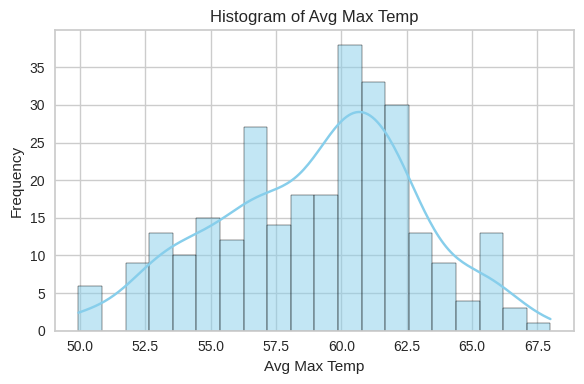

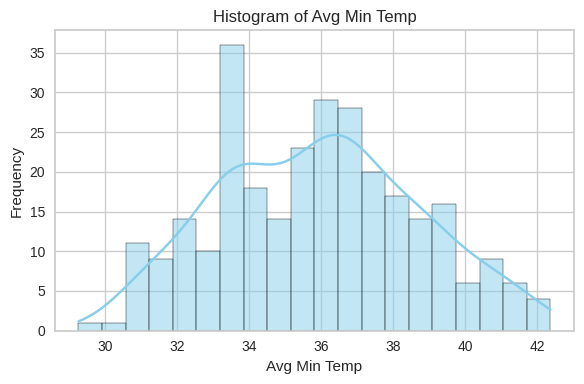

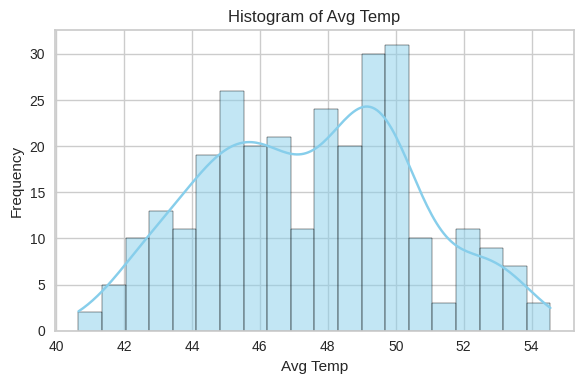

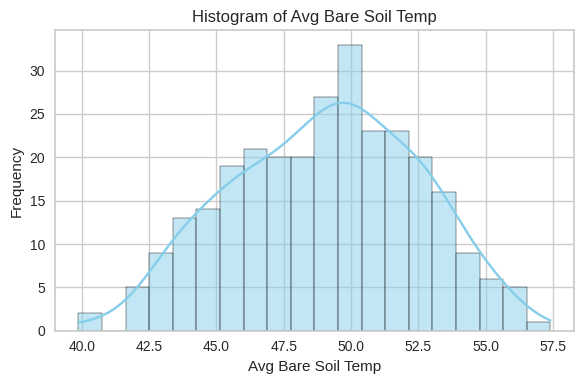

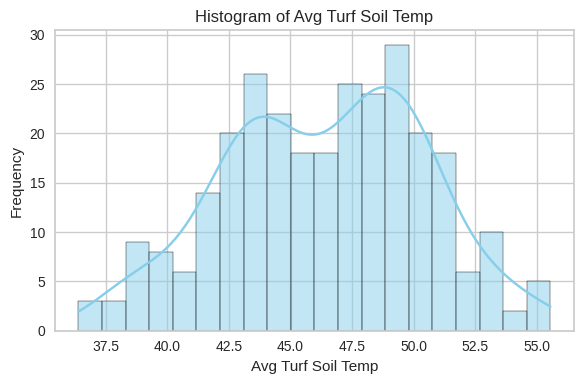

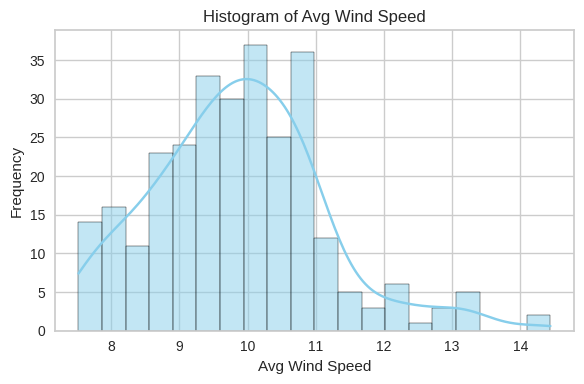

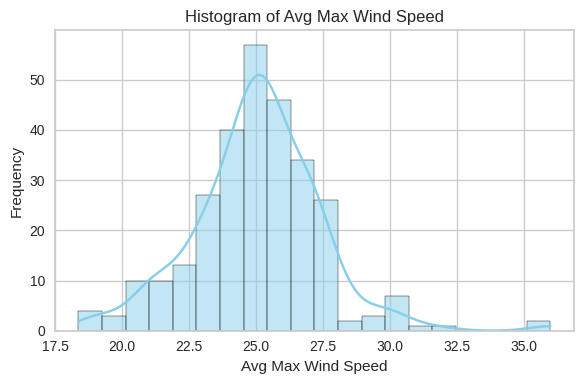

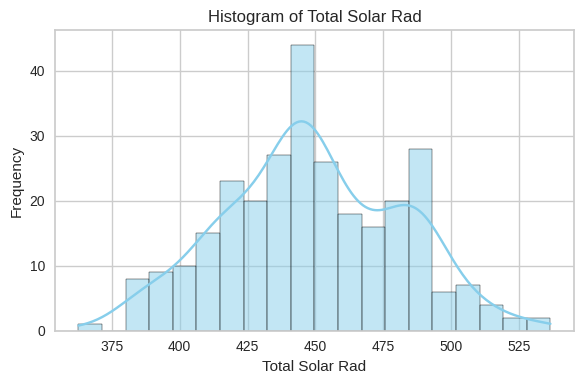

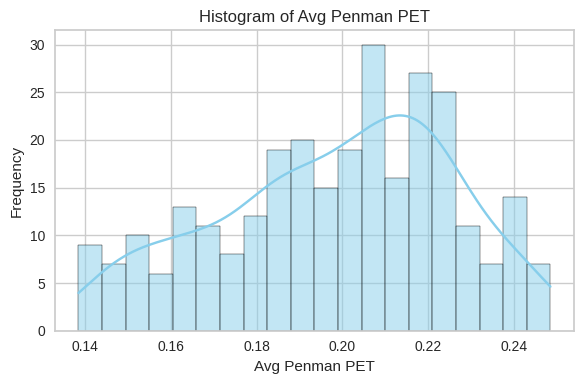

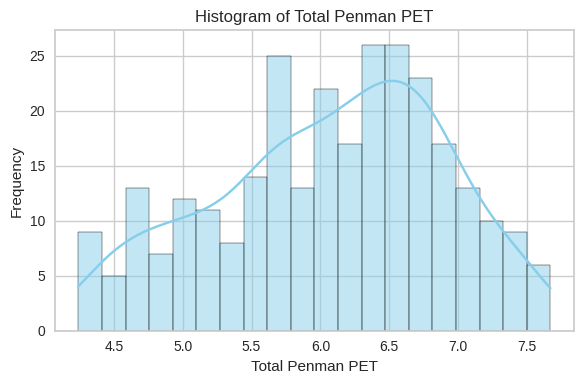

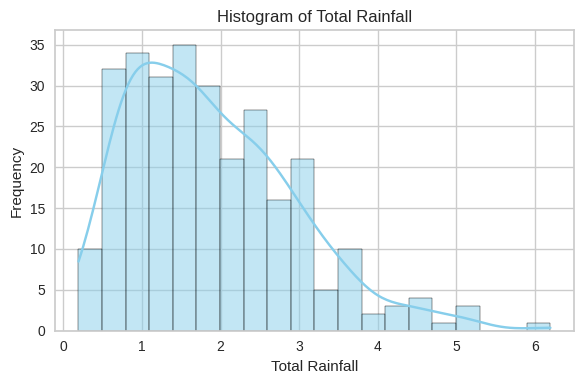

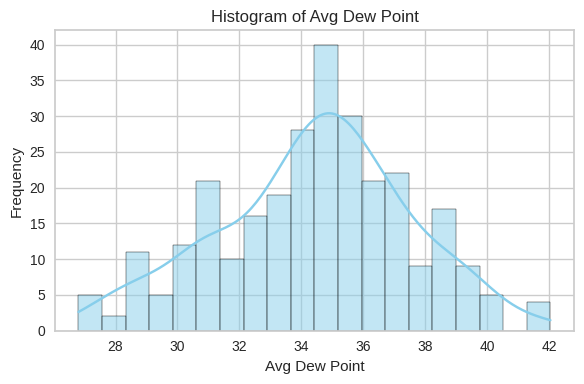

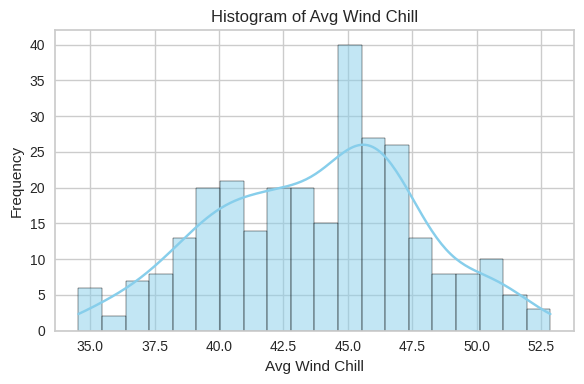

In [23]:
#Shows histogram for each feature compared to the target 'Value'
#Loop is used to go through each feature one by one
features = df_main.columns[1:14]

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_main[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

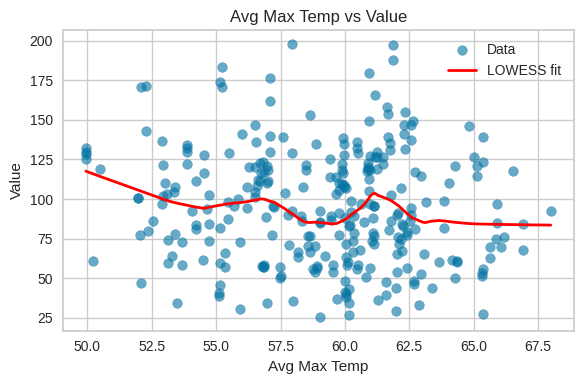

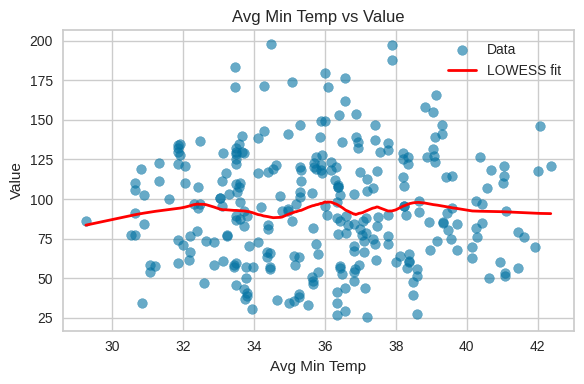

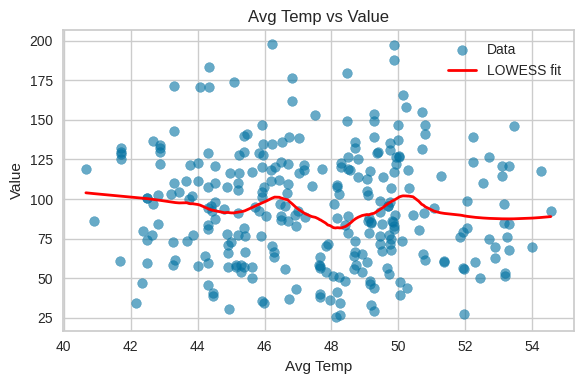

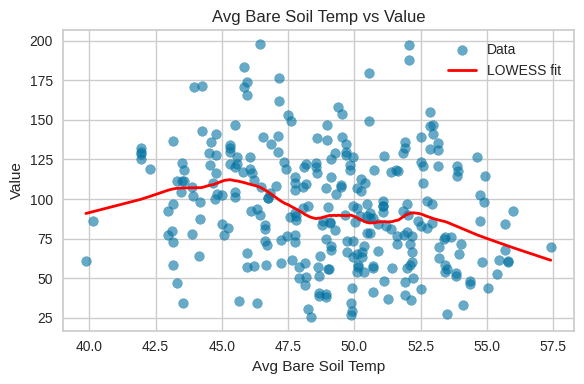

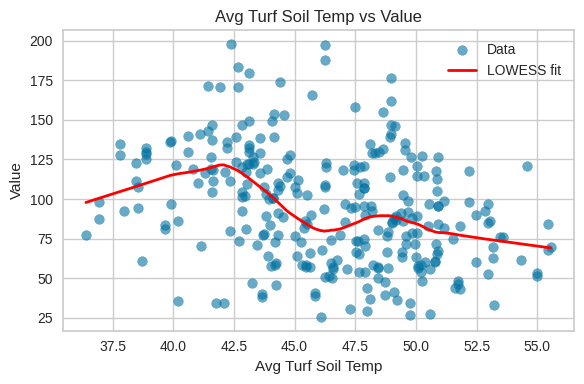

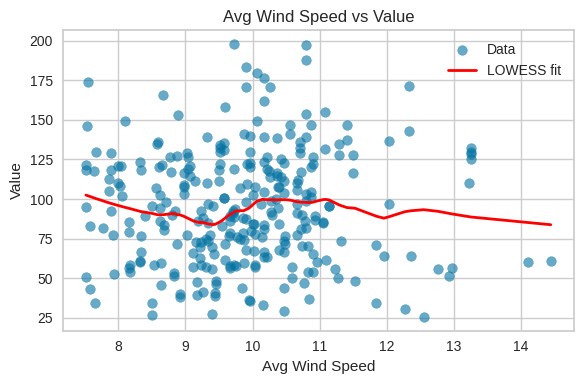

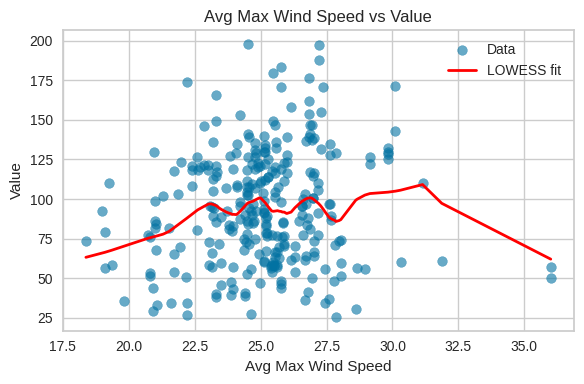

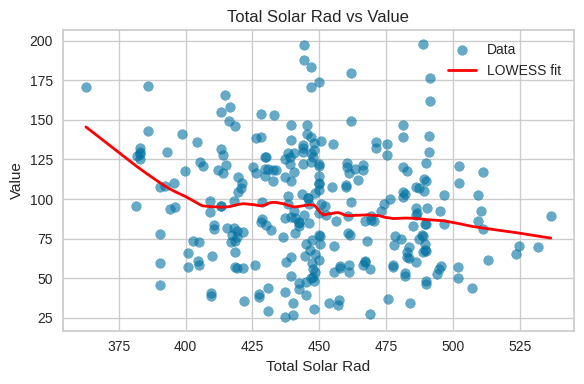

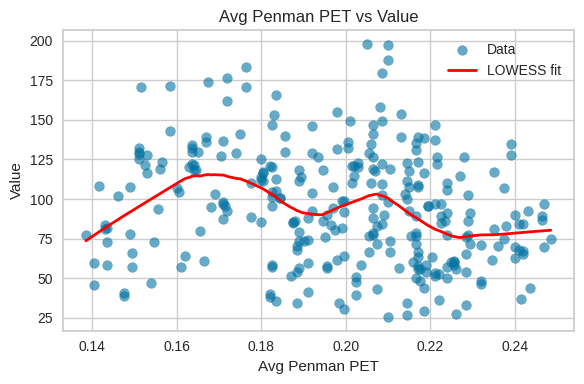

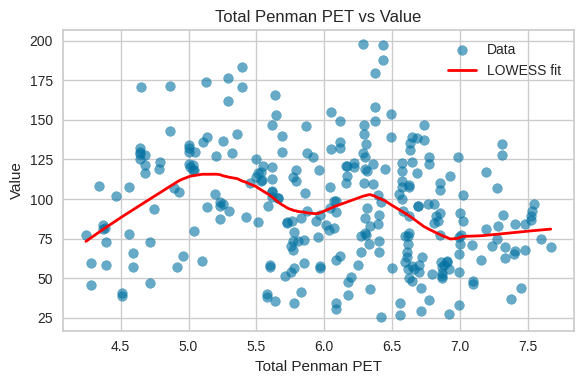

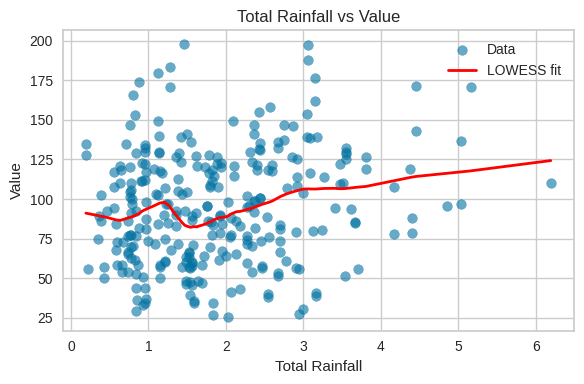

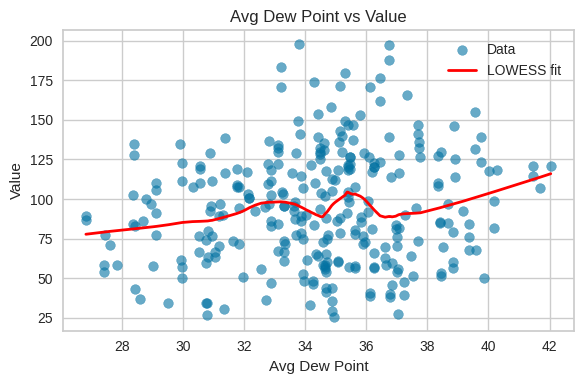

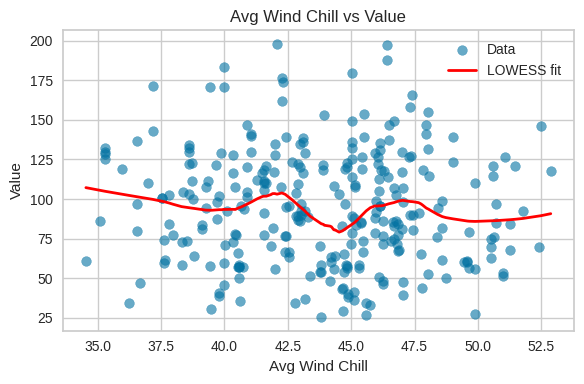

In [25]:
import statsmodels.api as sm

target_col = 'Value'
features = [col for col in df_main.columns if col != target_col]

for feature in features:
    x = df_main[feature]
    y = df_main[target_col]

    # Apply LOWESS smoothing
    lowess = sm.nonparametric.lowess
    smoothed = lowess(y, x, frac=0.3)  # frac controls the smoothness

    # Plot
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, label='Data', alpha=0.6)
    plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label='LOWESS fit', linewidth=2)
    plt.xlabel(feature)
    plt.ylabel(target_col)
    plt.title(f'{feature} vs {target_col}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


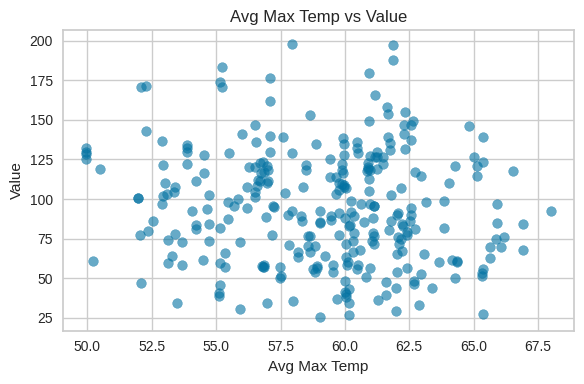

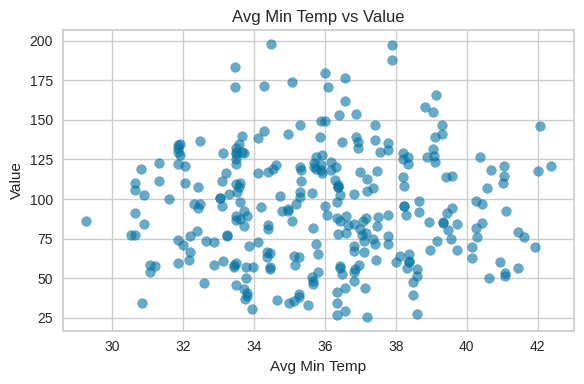

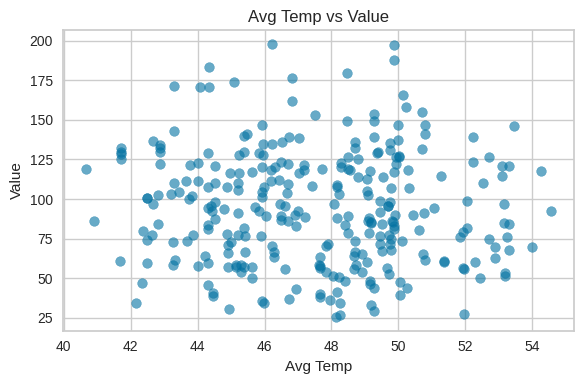

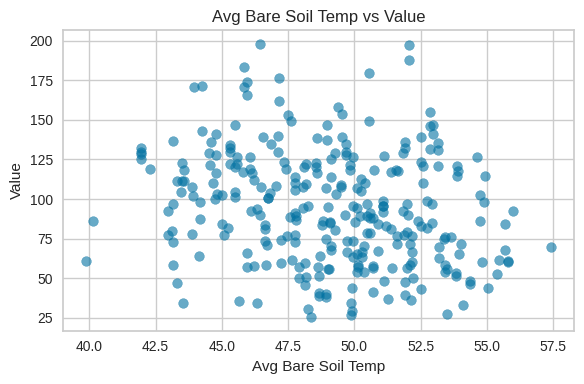

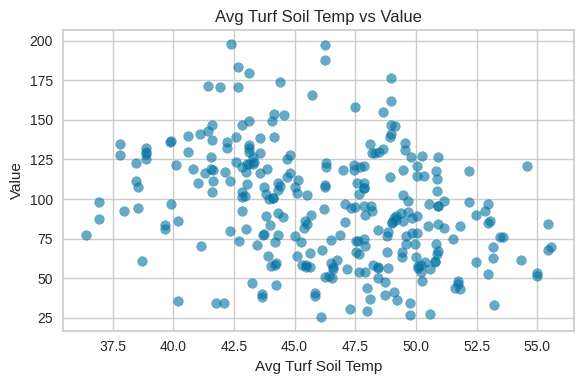

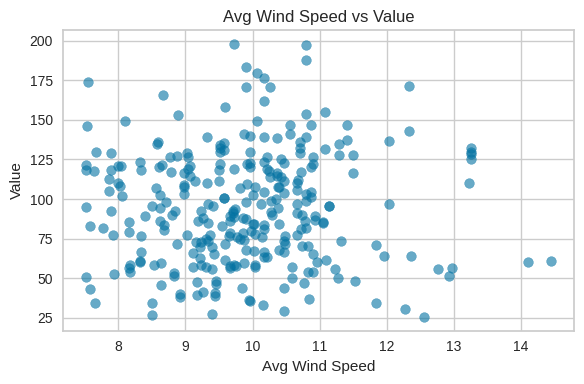

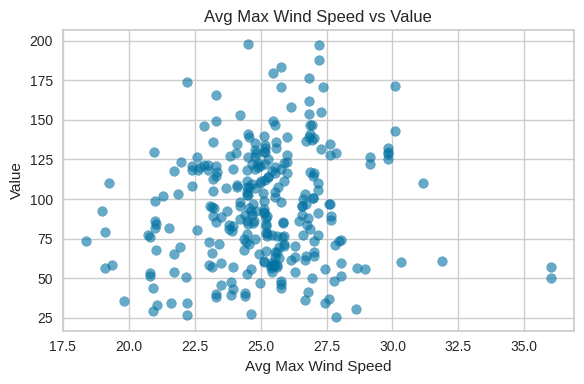

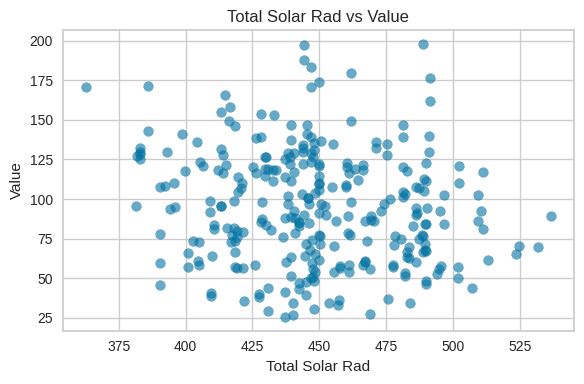

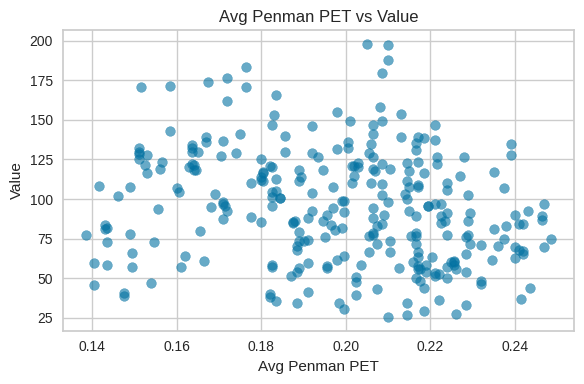

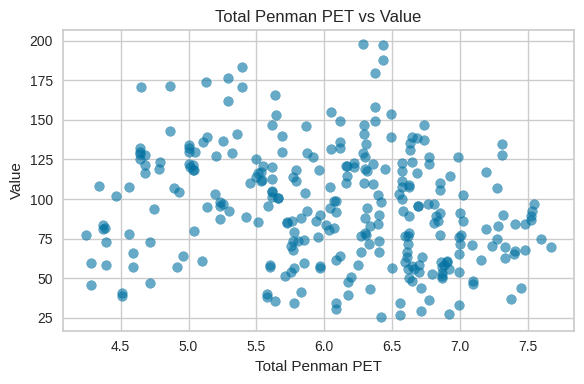

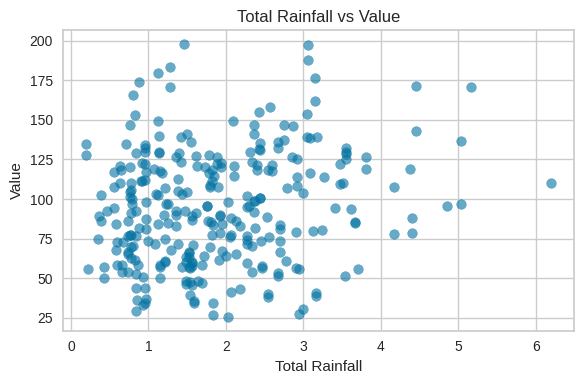

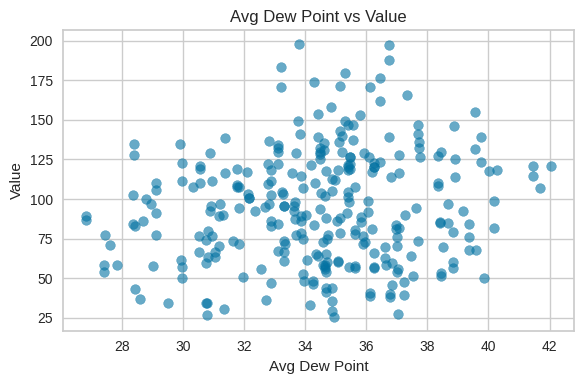

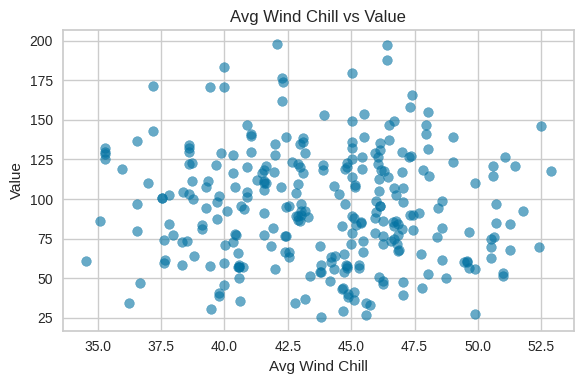

In [26]:
target_col = 'Value'  # Change this to the actual name of your target column

# Plot each feature against the target
for col in df_main.columns:
    if col != target_col:
        plt.figure(figsize=(6, 4))
        plt.scatter(df_main[col], df_main[target_col], alpha=0.6)
        plt.title(f"{col} vs {target_col}")
        plt.xlabel(col)
        plt.ylabel(target_col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
